# **Honey Production**

#### The honeybees are in a precarious state right now. There have been articles about the decline of the honeybee population for various reasons. This project is to investigate this decline and how the trends of the past predict the future for the honeybees.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

#### Here is the loaded DataFrame about honey production in the *United States* from [Kaggle](https://www.kaggle.com/). It is called `df` and has the following columns:

- state
- numcol
- yieldpercol
- totalprod
- stocks
- priceperlb
- prodvalue
- year

In [4]:
df = pd.read_csv("https://s3.amazonaws.com/codecademy-content/programs/data-science-path/linear_regression/honeyproduction.csv")
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [5]:
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
print(prod_per_year)

    year     totalprod
0   1998  5.105093e+06
1   1999  4.706674e+06
2   2000  5.106000e+06
3   2001  4.221545e+06
4   2002  3.892386e+06
5   2003  4.122091e+06
6   2004  4.456805e+06
7   2005  4.243146e+06
8   2006  3.761902e+06
9   2007  3.600512e+06
10  2008  3.974927e+06
11  2009  3.626700e+06
12  2010  4.382350e+06
13  2011  3.680025e+06
14  2012  3.522675e+06


In [15]:
X = prod_per_year['year']
X = X.values.reshape(-1,1)
y = prod_per_year['totalprod']

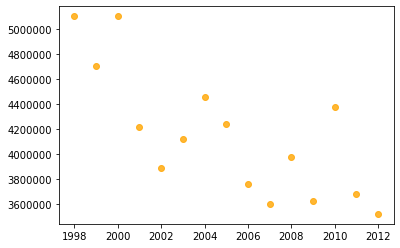

In [13]:
plt.scatter(X,y, alpha = 0.8, color = 'orange')
plt.show()

## Creating & Fitting Linear Regression Model

#### **Parameters**

Slope and Intercept of that fitted line

In [9]:
regr = linear_model.LinearRegression()
regr.fit(X,y)
print(regr.coef_[0])
print(regr.intercept_)

-88303.18915238192
181208083.10732976


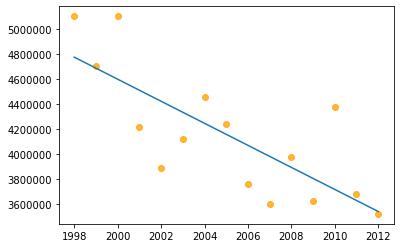

In [10]:
y_predict = regr.predict(X)
y_predict = y_predict.reshape(-1,1)
plt.figure()
plt.scatter(X,y, alpha = 0.8, color = 'orange')
plt.plot(X, y_predict)
plt.show()

## **Prediction of Honey Decline**

So, it looks like the production of honey has been in decline, according to this linear model. Let’s predict what the year 2050 may look like in terms of honey production.

The known dataset stops at the year 2013, so I've created an array that is the range from 2013 to 2050. 

In [11]:
x_future = np.array(range(2013,2051))
x_future = x_future.reshape(-1, 1)

future_predict = regr.predict(x_future)
future_predict = future_predict.reshape(-1,1)

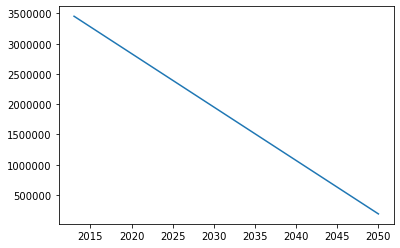

In [12]:
plt.figure()
plt.plot(x_future, future_predict)
plt.show()